<p><center><h2>**Americans' Axes of Political Conflict:**</center></h2>
<center><h3>**Relationships Among Economic, Social, and Racial Identities**</center></h3></p>
<p><center><h4>Mark Nagel</center></h4>
<center><h4>June 29, 2017</center></h4></p>

### 1. Introduction

For more than a generation, Americans have been in conflict with each other across various economic, social, and racial lines.  These struggles have pitted rich versus poor, urban versus rural, well educated versus less educated, white versus black, and native born versus immigrants.  These tensions have become most visible during political elections, when the stakes are highest for adversarial groups.

While many factors contributed to Donald Trump's victory in the U.S. presidential election, explanations for his success have generally focused on the demographics of his supporters.  Trump's voters tended to be mostly white, older men.  Trump scored a large victory among whites without college degrees, and he drew overwhelming support from rural voters.(1)   The white, working-class voters who supported Trump were struggling with economic hardship as their incomes failed to keep pace with the cost of living.(2) 

It is widely accepted that these axes of conflict along economic, social, and racial lines are a powerful driver in American politics.  Using quantitative tools, this paper examines the relationships among these factors to better understand their role in the U.S. political system.  This paper asks several questions.  How strong are the relationships among these economic, social, and racial variables?  To what extent does the data support the popular portrait of U.S. society in conflict?  From an economic perspective, to what extent is material well being, as measured by median household income, affected by variables such as education, race, country of origin, and urbanization? 

This paper has three sections.  The first section describes the data that is used in the analysis.  The second section analyzes the data to understand the relationships among the economic, social, and racial variables that are seen to drive U.S. politics.  The third section proposes further research.

_________________________________________
(1) See Jeremy W. Peters, Megan Thee-Brenan, and Dalia Sussman, "Election Exit Polls Reveal a Starkly Divided Nation," New York Times, 8 November 2016, accessed 19 June 2017, https://www.nytimes.com/2016/11/09/us/politics/election-exit-polls.html.

(2) See Greg Sargent, "Why Did Trump Win? New Research by Democrats Offers a Worrisome Answer," Washington Post, 1 May 2017, accessed 19 June 2017, https://www.washingtonpost.com/blogs/plum-line/wp/2017/05/01/why-did-trump-win-new-research-by-democrats-offers-a-worrisome-answer/?utm_term=.128b878517b4.


### 2. Description of the Data

This section describes the data used in this paper.  The data was obtained from the U.S. Census Bureau.  

The first step is to load statistical and visualization modules into Jupyter Notebook.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
import statistics

With the modules in place, the next step is to load each CSV file into Python and transform it into a data frame.  For each of the CSV files from the Census Bureau, it is necessary to tell Pandas which encoding to use because the data contains non-unicode characters.

In [96]:
df_education = pd.read_csv('education by county.csv',encoding = "ISO-8859-1")

In [97]:
df_employment = pd.read_csv('employment status by county.csv',encoding = "ISO-8859-1")

In [98]:
df_income = pd.read_csv('household income.csv',encoding = "ISO-8859-1")

In [99]:
df_native_born = pd.read_csv('native born.csv',encoding = "ISO-8859-1")

In [100]:
df_poverty = pd.read_csv('poverty by county.csv',encoding = "ISO-8859-1")

In [101]:
df_race = pd.read_csv('race by county.csv',encoding = "ISO-8859-1")

In [102]:
df_rural = pd.read_csv('urban rural by county 2010.csv',encoding = "ISO-8859-1")

At this point, all of the data is contained within seven different data frames.  The next step in the process is to combine the data frames using a left merge operation.  The key for the merge is the county name in each file.  The first operation merges the education and employment data frames into a new data frame -- "merged_df."

In [103]:
merged_df = pd.merge(left=df_education, right=df_employment, left_on="GEO.display-label", right_on="GEO.display-label")

Using a left merge, the remaining five data frames are merged into "merged_df."

In [104]:
merged_df = merged_df.merge(df_income,how='left', left_on='GEO.display-label', right_on='GEO.display-label')

In [105]:
merged_df = merged_df.merge(df_native_born,how='left', left_on='GEO.display-label', right_on='GEO.display-label')

In [106]:
merged_df = merged_df.merge(df_poverty,how='left', left_on='GEO.display-label', right_on='GEO.display-label')

In [107]:
merged_df = merged_df.merge(df_race,how='left', left_on='GEO.display-label', right_on='GEO.display-label')

In [108]:
merged_df = merged_df.merge(df_rural,how='left', left_on='GEO.display-label', right_on='GEO.display-label')

In addition to containing the nine variables of interest, the merged data frame also includes the identifying columns from each separate data frame.  As a result, the merged data frame has redundant columns that need to be removed.

In [109]:
merged_df.columns

Index(['GEO.id_x', 'GEO.id2_x', 'GEO.display-label', 'ALL_COLLEGE_PER',
       'WHITE_COLLEGE_PER', 'GEO.id_y', 'GEO.id2_y', 'UE_RATE', 'GEO.id_x',
       'GEO.id2_x', 'MED_HH_INCOME', 'GEO.id_y', 'GEO.id2_y', 'NATIVE_PER_3',
       'GEO.id_x', 'GEO.id2_x', 'ALL_POVERTY_PER', 'WHITE_POVERTY_PER',
       'GEO.id_y', 'GEO.id2_y', 'WHITE_PER_3', 'GEO.id', 'GEO.id2',
       'RURAL_PER_3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [110]:
merged_df = merged_df.drop(['GEO.id2_x', 'GEO.id_y', 'GEO.id2_y', 'GEO.id_x', 'GEO.id', 'GEO.id2', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1)

After running the drop method, the modified data frame now contains only the names of each county in the United States and the nine variables of interest.

In [111]:
merged_df.columns

Index(['GEO.display-label', 'ALL_COLLEGE_PER', 'WHITE_COLLEGE_PER', 'UE_RATE',
       'MED_HH_INCOME', 'NATIVE_PER_3', 'ALL_POVERTY_PER', 'WHITE_POVERTY_PER',
       'WHITE_PER_3', 'RURAL_PER_3'],
      dtype='object')

With the merged data frame complete, it is now possible to begin analyzing the data.  To understand the variables, the paper will review summary statistics and visualizations.

The summary statistics for the variables are shown, below.  The statistics summarize data on all of the counties in the United States.  These means -- which are means of means for each county -- may differ from straight calculations of statistics on the total U.S. population.  The county data is used instead of the national data in order to see the variation across these local government units, which are relevant for understanding national elections.  All of the data is for 2015, except for the percent of residents who live in rural areas, which is from 2010.  

On average across U.S. counties, 20.4% of all adult residents and 22.7% of white residents have a Bachelor's degree or higher.  The unemployment rate was 7.8%, and median household income was $46,830.  On average, 95.4% of the residents of each county were born in the United States.  Approximately 16.7% of all county residents and 13.2% of white county residents were living below the poverty line.  Across all of the counties, 83.5% of residents were white.  And finally, 59.3% of county residents were classified as living in rural areas.

In [112]:
pd.options.display.float_format = '{:,.1f}'.format
merged_df.describe()

,ALL_COLLEGE_PER,WHITE_COLLEGE_PER,UE_RATE,MED_HH_INCOME,NATIVE_PER_3,ALL_POVERTY_PER,WHITE_POVERTY_PER,WHITE_PER_3,RURAL_PER_3
count,"3,142.0","3,142.0","3,142.0","3,142.0","3,142.0","3,142.0","3,142.0","3,142.0","3,138.0"
mean,20.4,22.7,7.8,"46,830.4",95.4,16.7,13.2,83.5,59.3
std,9.0,10.3,3.6,"12,249.3",5.7,6.6,5.2,16.6,30.9
min,1.9,4.4,0.0,"19,328.0",48.3,1.4,0.0,4.7,0.0
25%,14.2,15.6,5.5,"38,826.2",94.3,12.0,9.5,77.1,34.9
50%,18.2,20.2,7.5,"45,112.5",97.4,16.0,12.6,90.1,59.4
75%,24.2,26.9,9.7,"52,249.2",98.7,20.3,16.2,95.5,88.2
max,78.8,90.5,29.4,"123,453.0",100.0,53.3,43.0,100.0,100.0


Having surveyed the variables' means, the analysis moves on to variation.  Variation can be seen in the summary table, above -- in the standard deviation and in the percentile figures -- but a better way to understand variation across the data is to look at visualizations.  The two types of visualizations used here are box plots and histograms.

The first set of box plots, below, presents the eight variables with data that ranges from 0 to 100%.  Each box represents the central tendency of the distribution, from the 25th to the 75th percentile.  Because all of these variables share the same percentile scale, is it possible to evaluate variation across the variables by comparing the size of the boxes.  The rural population variable has the widest variation around the mean -- much larger than the other variables -- followed by the percent of a county's population that is white.  The plots for all of the variables, except for percent of the rural population, show outliers beyond the bounds of the distribution.  

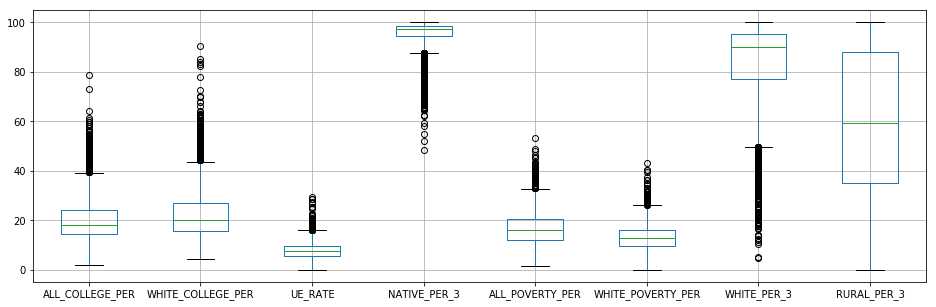

In [122]:
merged_df.boxplot(['ALL_COLLEGE_PER', 'WHITE_COLLEGE_PER', 'UE_RATE', 'NATIVE_PER_3', 'ALL_POVERTY_PER', 'WHITE_POVERTY_PER', 'WHITE_PER_3', 'RURAL_PER_3'], figsize=(16, 5), widths = .5)
plt.show()  # hides the output buffer and shows the visualization

The box plot for the ninth variable, median household income, is shown separately, below, because the data is presented in U.S. dollars.  The size of the box indicates a relatively narrow range around the mean.  As with almost all of the other variables, the income data includes a significant tail that extends beyond the bounds of the distribution.  This upward tail perhaps reflects the rapidly growing wealth of the most affluent Americans.  The data is significant from a political perspective because it shows that the residents of some counties are, on average, two or three times wealthier than the residents of most counties in the country. 

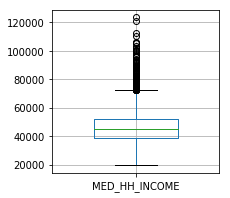

In [119]:
merged_df.boxplot(['MED_HH_INCOME'], figsize=(3, 3), widths = .5)
plt.show()

Turning to another visualization tool, the histogram provides more detail about the distribution of each variable's data.  The first set of histograms, below, presents the eight variables with data that ranges from 0 to 100%.  The two education variables -- for all residents and white residents -- show a strong central tendency with a long upward tail.  This distribution shows that there is a relatively small number of counties with a more highly educated population.  In some of these counties, more than 50% of adult residents have a Bachelor's degree or higher.  

The two poverty variables -- for all residents and white residents -- also show a strong central tendency and an upward tail, although these tails appear less extreme than the ones for education.  The two "nativist" variables -- for the percentage of residents who are white and who were native born -- show strong central tendencies close to 100%, with a rapidly declining tail to the left.  This tail represents the relatively small number of counties with smaller white and native born populations. 

The distribution for the unemployment rate looks the most normal, although it, too, has an upward tail representing counties with relatively significant joblessness.  And finally, the rural population variable has the most interesting distribution of them all. It has a relatively weak central tendency around its mean of 59.3%, with a large share of its value in a broad distribution.  This weak central tendency is consistent with the box plot, in which the large box illustrated the significant variation around the mean.  As the right side of the tail nears 100%, the data spikes to its highest values.  This spike shows that there is a large number of U.S. counties that are entirely or almost entirely rural.

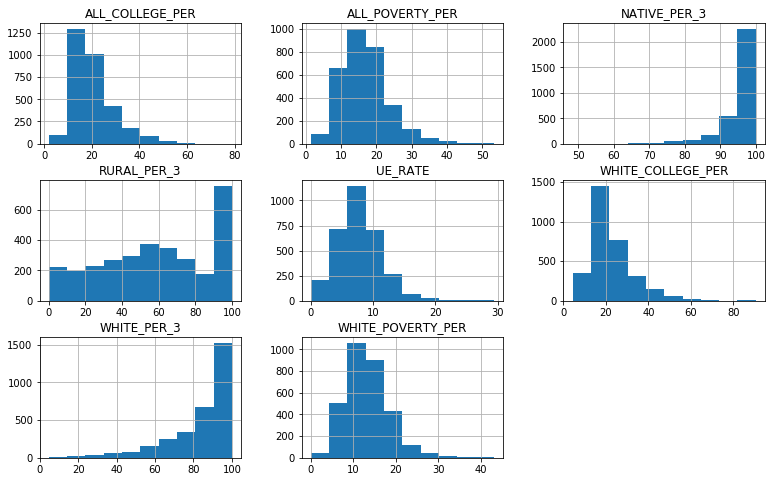

In [120]:
merged_df.hist(['ALL_COLLEGE_PER', 'WHITE_COLLEGE_PER', 'UE_RATE', 'NATIVE_PER_3', 'ALL_POVERTY_PER', 'WHITE_POVERTY_PER', 'WHITE_PER_3', 'RURAL_PER_3'], figsize=(13, 8), bins=10)
plt.show()

The histogram for median household income, below, shows a strong central tendency with a longer increasing tail.  This long upward tail corresponds to the outliers in the box plot.  A relatively small group of U.S. counties is much wealthier than the average.

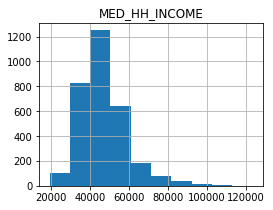

In [121]:
merged_df.hist(['MED_HH_INCOME'], figsize=(4, 3), bins=10)
plt.show()

### 3. Analysis

This section examines the relationships among economic, social, and racial variables to gain insight into the forces that are driving U.S. politics.  The table, below, shows the correlation coefficients for all of the variables. The two education variables are highly correlated with median household income.  The coefficient for all residents with a Bachelor's degree or higher -- at 0.68 -- is significantly higher than for white residents -- which is at 0.59.  This difference suggests that the relationship between education and income is higher for non-whites than for whites.  Further investigation is needed to understand why.  Consistent with the positive relationship between education and income, the table also shows a moderately strong negative correlation between education and poverty.  

According to electoral data, the nativist and rural variables offer the most insight regarding Donald Trump's core supporters.  Although the percent white variable has a moderately negative correlation -- at -0.21 -- with receiving a Bachelor's degree or higher, it also has a relatively strong negative correlation -- at -0.51 -- with the unemployment rate.  Thus, even though the residents of whiter counties are less likely to attend higher education, they are also more likely to be employed than the residents of less white counties.  This observation has obvious political significance.  Further analysis, beyond the scope of this report, is required. 

Continuing to examine the nativst variables, the table reveals that the whiter counties are very slightly more likely -- with a correlation coefficient of 0.15 -- to have higher income, but the counties with more native born and rural residents have a more strongly negative correlation -- at about -0.35 for both variables -- with income.  Similarly, counties with more native born and rural residents have moderately strong positive correlations -- at 0.26 and 0.20, respectively -- with the share of a county's white residents who live in poverty.  Thus, the white and native born residents in rural counties are more likely to have lower income and live in poverty.  The data, indeed, paints a stark portrait of the rural, whiter, and poorer counties that supported Donald Trump.

In [117]:
pd.options.display.float_format = '{:,.2f}'.format
merged_df.corr()

,ALL_COLLEGE_PER,WHITE_COLLEGE_PER,UE_RATE,MED_HH_INCOME,NATIVE_PER_3,ALL_POVERTY_PER,WHITE_POVERTY_PER,WHITE_PER_3,RURAL_PER_3
ALL_COLLEGE_PER,1.00,0.92,-0.30,0.68,-0.36,-0.42,-0.43,0.01,-0.46
WHITE_COLLEGE_PER,0.92,1.00,-0.17,0.59,-0.50,-0.26,-0.43,-0.21,-0.48
UE_RATE,-0.30,-0.17,1.00,-0.44,0.01,0.65,0.40,-0.51,-0.04
MED_HH_INCOME,0.68,0.59,-0.44,1.00,-0.35,-0.75,-0.70,0.15,-0.35
NATIVE_PER_3,-0.36,-0.50,0.01,-0.35,1.00,0.06,0.26,0.22,0.45
ALL_POVERTY_PER,-0.42,-0.26,0.65,-0.75,0.06,1.00,0.72,-0.50,0.09
WHITE_POVERTY_PER,-0.43,-0.43,0.40,-0.70,0.26,0.72,1.00,0.05,0.20
WHITE_PER_3,0.01,-0.21,-0.51,0.15,0.22,-0.50,0.05,1.00,0.18
RURAL_PER_3,-0.46,-0.48,-0.04,-0.35,0.45,0.09,0.20,0.18,1.00


### 4. Future Research

To better understand the relationships among economic, social, and racial factors and political preferences, it could be very interesting to compare the variables in this paper with electoral data.  In fact, the initial vision of this paper was to compare these variables to counties' electoral results in 2016.  However, this effort was unfortunately stymied by the technical challenges of merging the data.  The voting data includes the names of the counties in a format that is different from the one used by the Census Bureau.  In preparing this paper, it wasn't possible at this time to create a key for merging the Census data with the voting data.  I believe that a workable solution to this technical problem will soon be found.  Gaining more insight into the electoral results of 2016 is particularly important as we look ahead to the looming elections in 2018 and 2020.